In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
#Cargemos la información de lso vinos
wine = pd.read_csv("Wine.csv")
wine.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [27]:
#Miremos los tpos de variables que contiene la matriz
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        1143 non-null   float64
 1   volatileacidity     1143 non-null   float64
 2   citricacid          1143 non-null   float64
 3   residualsugar       1143 non-null   float64
 4   chlorides           1143 non-null   float64
 5   freesulfurdioxide   1143 non-null   float64
 6   totalsulfurdioxide  1143 non-null   float64
 7   density             1143 non-null   float64
 8   pH                  1143 non-null   float64
 9   sulphates           1143 non-null   float64
 10  alcohol             1143 non-null   float64
 11  quality             1143 non-null   int64  
 12  Id                  1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [28]:
#Revisemos si la matriz tiene información perida 
wine.isnull().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
Id                    0
dtype: int64

In [29]:
#MIremos la descripcion de la matriz
wine.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


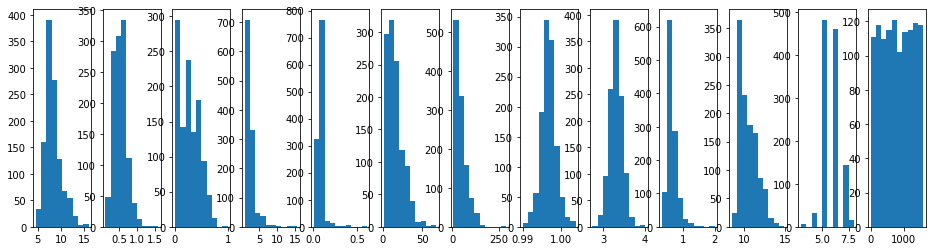

In [30]:
#En esta matri miremos la distribución de las curvas
fig, ax = plt.subplots(1,wine.shape[1],figsize=(16,4))
for i in range( wine.shape[1]):
    ax[i].hist(wine.iloc[:,i])

In [31]:
#Vamos a buscar outliers en las variables numerica
wine_numeric = wine.select_dtypes(np.number)
wine_numeric.columns
#SOlo quiero estas columnas porqeu las otras son numeros enteros
columnas = ['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar','chlorides',
            'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH','sulphates', 'alcohol']

(1143, 13)

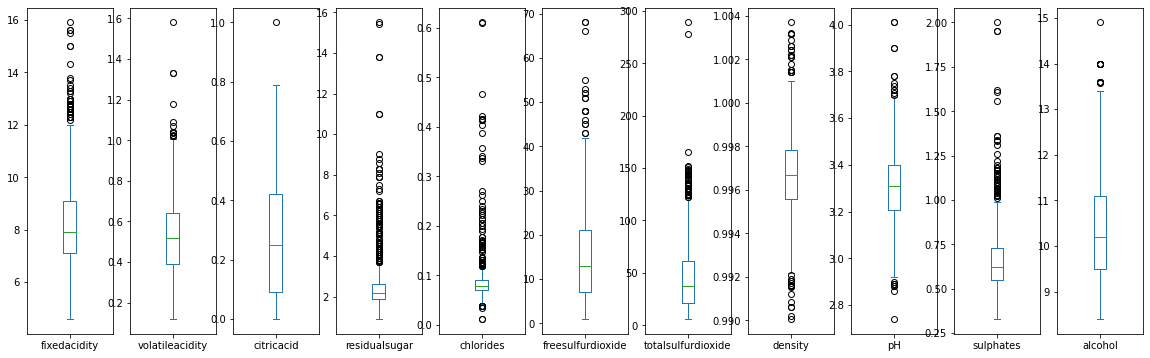

In [32]:
#Miremos las graficas de caja y tratar de encontrar outliers
plt.figure(figsize = (20, 6))
for i, col in enumerate(columnas):
    plt.subplot(1, len( columnas), i+1)
    wine[col].plot(kind = 'box')
wine.shape

(848, 13)

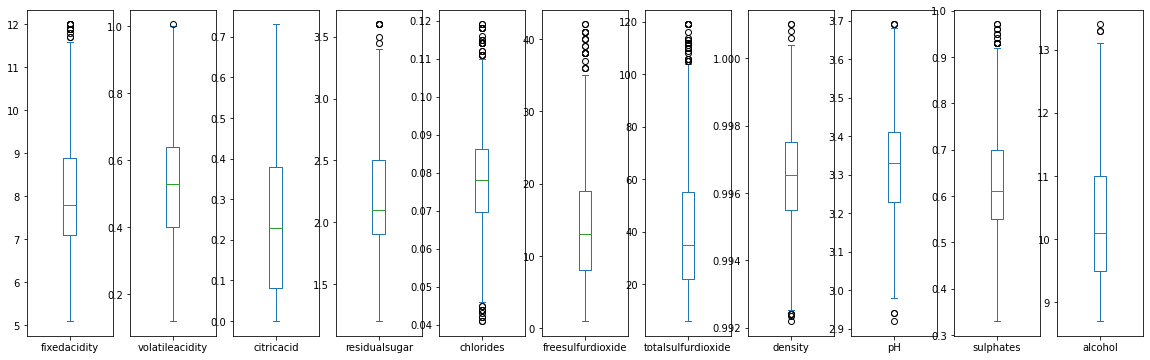

In [33]:
#Eliminemos los outliers
def remove_outlier(df, columnas):
    df = df.copy()
    for col in columnas:
        q1 = df[col].quantile(q = 0.25)
        q3 = df[col].quantile(q = 0.75)
        intr_qr = q3 - q1
        upper_range = q3 + (1.5*intr_qr)
        lower_range = q1 - (1.5*intr_qr)
        df.loc[df[col] > upper_range, col] = np.nan
        df.loc[df[col] < lower_range, col] = np.nan
    return df.dropna()
wine = remove_outlier(wine, columnas)

plt.figure(figsize = (20, 6))
for i, col in enumerate(columnas):
    plt.subplot(1, len(columnas), i+1)
    wine[col].plot(kind = 'box')
wine.shape

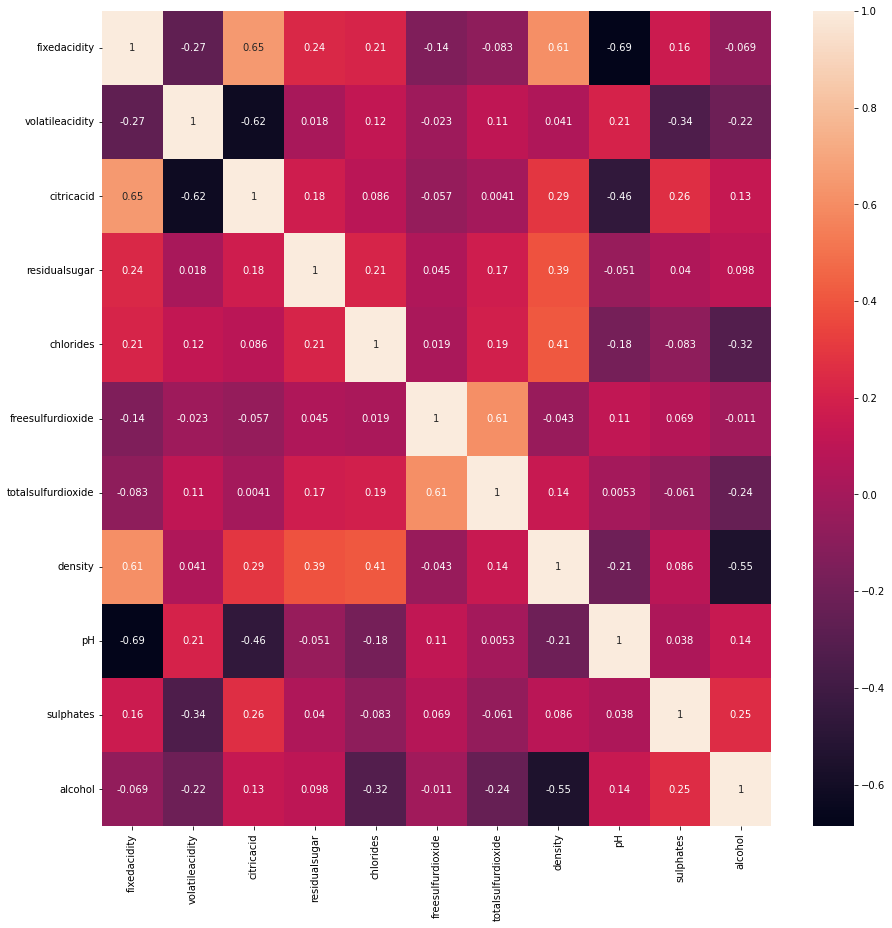

In [40]:
# Miremos la correlacion de cada variable
plt.figure(figsize=(15,15))  
corr = wine.iloc[:,:-1].corr()
sns.heatmap(corr, annot= True)
plt.show()

In [38]:
#Vamos a deshacernos de la columnas ID 
wine = wine.drop(["Id"], axis=1)
wine.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
#Guardemos una copia de la data ya depurada 
data = wine.copy()
#VAmos a standarizar los datos con variables continuas 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
for col in columnas:
    wine[col] = scaler.fit_transform(wine[[col]])
wine.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,-0.492327,1.033360,-1.331561,-0.642757,-0.173228,-0.434763,-0.302933,0.787890,1.352747,-0.627124,-0.987053,5
1,-0.207494,2.123008,-1.331561,0.925111,1.364232,1.171681,0.981114,0.164587,-0.935312,0.423694,-0.579239,5
2,-0.207494,1.396576,-1.108758,0.253167,0.944924,0.024221,0.475277,0.289248,-0.492462,0.160989,-0.579239,5
3,2.213582,-1.509153,1.787676,-0.642757,-0.243112,0.253713,0.708741,0.912551,-1.230545,-0.451988,-0.579239,6
4,-0.492327,1.033360,-1.331561,-0.642757,-0.173228,-0.434763,-0.302933,0.787890,1.352747,-0.627124,-0.987053,5


In [42]:
#Para mirar el resultado hay que reducir las dimensiones del dataframe de 12 a 2.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wine.values)
train_pca = pca.transform(wine.values)
print("Original shape: {}".format(str(wine.shape)))
print("Reduced shape: {}".format(str(train_pca.shape)))
wine = pd.DataFrame ( train_pca , columns=["pc1","pc2"])

Original shape: (848, 12)
Reduced shape: (848, 2)


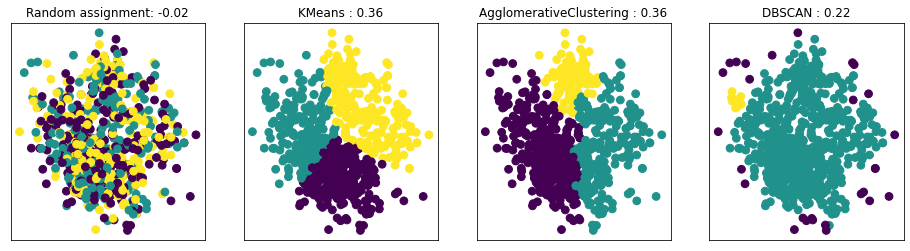

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

algorithms = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN()]

fig, axes = plt.subplots(1, 4, figsize=(16, 4), subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=3, size=len(wine))

#plot random assignment
axes[0].scatter(wine.iloc[:, 0], wine.iloc[:, 1], c=random_clusters, s=60)
axes[0].set_title("Random assignment: {:.2f}".format( silhouette_score(wine, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):    
    clusters = algorithm.fit_predict(wine)    
    # plot the cluster assignments and cluster centers
    ax.scatter(wine.iloc[:, 0], wine.iloc[:, 1], c=clusters, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,silhouette_score(wine, clusters)))

In [46]:
print( wine.shape , data.shape)
kmeans = KMeans(n_clusters=3, random_state=0)
catgeory = kmeans.fit_predict(wine)
category = pd.DataFrame( kmeans.labels_, columns= ["Category"])
print( category.shape ) 
index = np.arange(0,848)
data = data.reindex( index )
print( data.index ) 
print( category.index )
data_cluster = pd.merge(data, category, left_index=True, right_index=True, how="inner")
data_cluster.shape

(848, 2) (848, 12)
(848, 1)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            838, 839, 840, 841, 842, 843, 844, 845, 846, 847],
           dtype='int64', length=848)
RangeIndex(start=0, stop=848, step=1)


(848, 13)

In [47]:
data_cluster.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,1


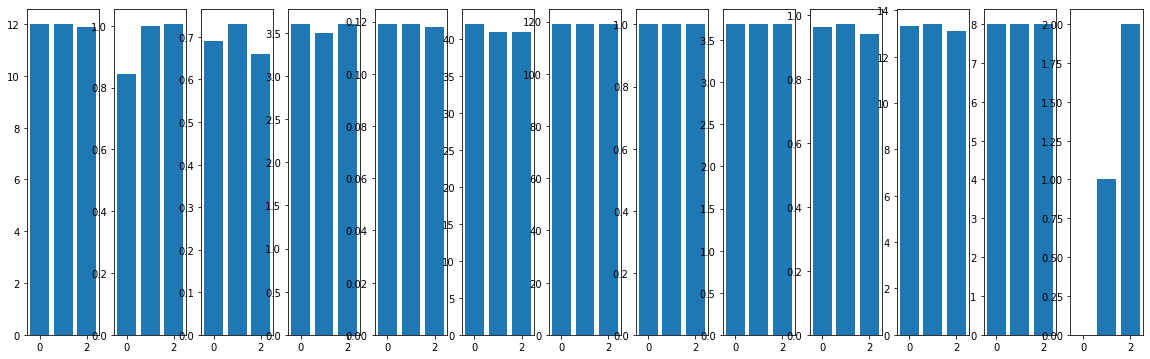

In [66]:
fig, ax = plt.subplots(1,data_cluster.shape[1], figsize = (20, 6))
for i in range(data_cluster.shape[1]):
    ax[i].bar(data_cluster["Category"], data_cluster.iloc[:,i])

